In [7]:
import pandas as pd

# Adjust the file path as needed
file_path = '/Users/taief/Desktop/MusicTry/DATA/data_by_year.csv'
data_by_year = pd.read_csv(file_path)

data_by_year.head()


,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845,10
2,1,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189,0
3,1,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10
4,1,1925,0.962607,0.573863,184986.924460,0.278594,0.418297,0.237668,-14.146414,0.111918,115.521921,0.621929,2.604317,5


In [8]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Selecting the features to use for clustering
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity']
data_selected = data_by_year[features]

# Dropping rows with missing values
data_clean = data_selected.dropna()

# Data normalization
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clean)

# Convert the scaled data back to a DataFrame (optional, for convenience)
data_scaled_df = pd.DataFrame(data_scaled, columns=features)


Number of components selected to retain 90% variance: 5
[0.62800078 0.13860079 0.11565085 0.05782755 0.02792029]


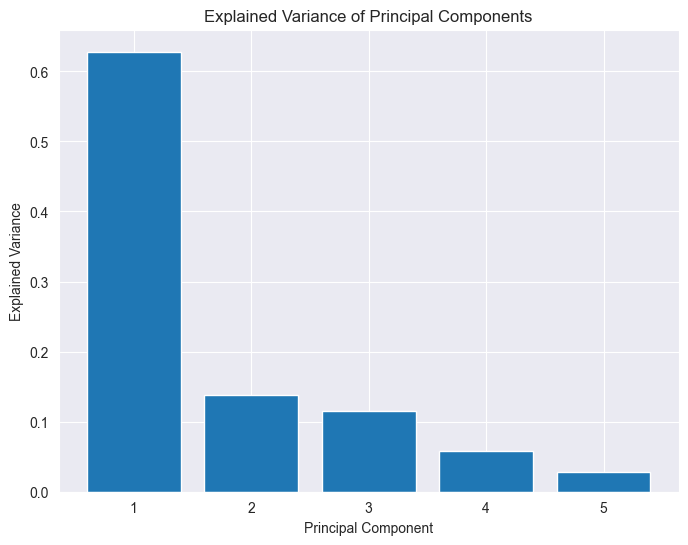

cumulative_variance [0.62800078 0.76660157 0.88225242 0.94007997 0.96800026]


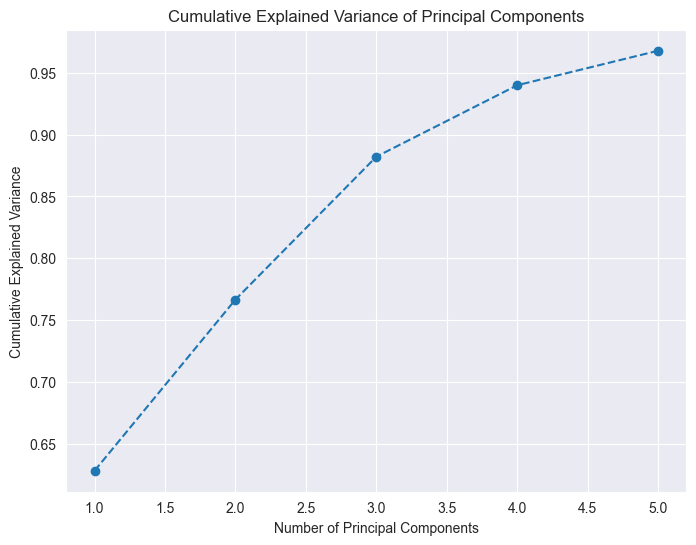

<Figure size 640x480 with 0 Axes>

In [9]:
from sklearn.decomposition import PCA


# Step 1: PCA for Dimensionality Reduction to retain 90% of the variance
pca = PCA(n_components=0.95)
data_pca = pca.fit_transform(data_scaled_df)

# Number of components selected to retain 90% variance
print(f"Number of components selected to retain 90% variance: {pca.n_components_}")

#print variance
print(pca.explained_variance_ratio_)

# Create a bar plot of the explained variance
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.title('Explained Variance of Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.show()

#cumulative variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()
print(f'cumulative_variance',cumulative_variance)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

#save plot
plt.savefig('/Users/taief/Desktop/MusicTry/figures/figures/cumulative_explained_variance1.png')

Number of components | Cumulative Variance Explained
----------------------|-------------------------------
         1           | 36.73%
         2           | 50.54%
         3           | 61.66%
         4           | 71.48%
         5           | 79.63%
         6           | 87.41%
         7           | 92.87%
         8           | 96.11%


     acousticness  danceability    energy  instrumentalness  liveness  \
PC1      0.380486     -0.250063 -0.388352          0.355772  0.246865   
PC2     -0.028622      0.485875 -0.004901         -0.004613  0.340296   
PC3     -0.052388      0.371454 -0.079938         -0.020598 -0.287277   
PC4      0.234758      0.332075 -0.173659          0.257952 -0.753181   
PC5      0.155415      0.350780  0.115713          0.661866  0.311383   

     loudness  speechiness     tempo   valence  popularity  
PC1 -0.377213     0.157405 -0.367360 -0.031053   -0.389078  
PC2 -0.017813     0.486481  0.156151  0.612114   -0.105886  
PC3 -0.006127     0.628849 -0.186321 -0.578505    0.071151  
PC4 -0.079666    -0.224055  0.012773  0.321225   -0.103637  
PC5  0.421675    -0.228725  0.078669 -0.254265    0.058481  


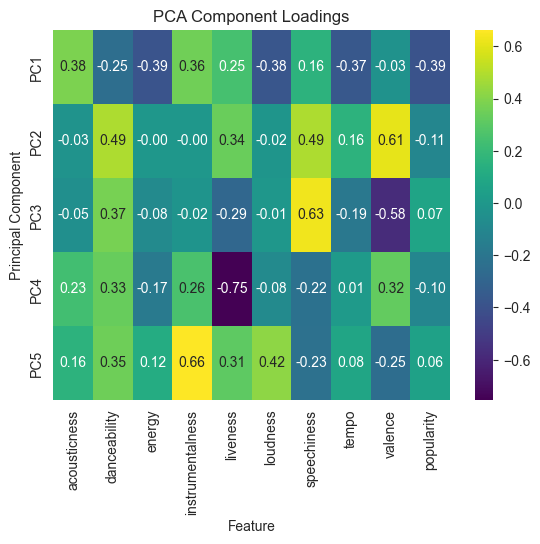

<Figure size 640x480 with 0 Axes>

In [10]:
import pandas as pd
import seaborn as sns

# Get the PCA components (loadings)
pca_components = pca.components_

# Create a DataFrame for better visualization
components_df = pd.DataFrame(pca_components, columns=features, index=[f'PC{i+1}' for i in range(pca.n_components_)])

# Display the DataFrame for interpretation
print(components_df)

sns.heatmap(components_df, cmap='viridis', annot=True, fmt=".2f")
plt.title("PCA Component Loadings")
plt.ylabel("Principal Component")
plt.xlabel("Feature")
plt.show()

#save plot
plt.savefig('/Users/taief/Desktop/MusicTry/figures/figures/pca_component_loadings1.png')


In [11]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

def hopkins_statistic(X):
    n, d = X.shape
    m = int(0.1 * n)  # Using 10% of the data for the test as a common practice
    nbrs = NearestNeighbors(n_neighbors=1).fit(X)

    rand_X = np.random.uniform(X.min(axis=0), X.max(axis=0), (m, d))
    u_dist = np.sum(nbrs.kneighbors(rand_X, return_distance=True)[0])
    w_dist = np.sum(nbrs.kneighbors(X, n_neighbors=2, return_distance=True)[0][:, 1])
    
    H = u_dist / (u_dist + w_dist)
    return H

H = hopkins_statistic(data_pca)
print(f"Hopkins Statistic: {H:.2f}")


Hopkins Statistic: 0.28


For n_clusters = 2, the silhouette score is: 0.50136528970424
For n_clusters = 3, the silhouette score is: 0.45911399686645005
For n_clusters = 4, the silhouette score is: 0.3559379122187714
For n_clusters = 5, the silhouette score is: 0.34731435733913535
For n_clusters = 6, the silhouette score is: 0.3719411380214247
For n_clusters = 7, the silhouette score is: 0.33992460154465215
For n_clusters = 8, the silhouette score is: 0.3430143513600142
For n_clusters = 9, the silhouette score is: 0.32668557913532553
For n_clusters = 10, the silhouette score is: 0.34028268585807253


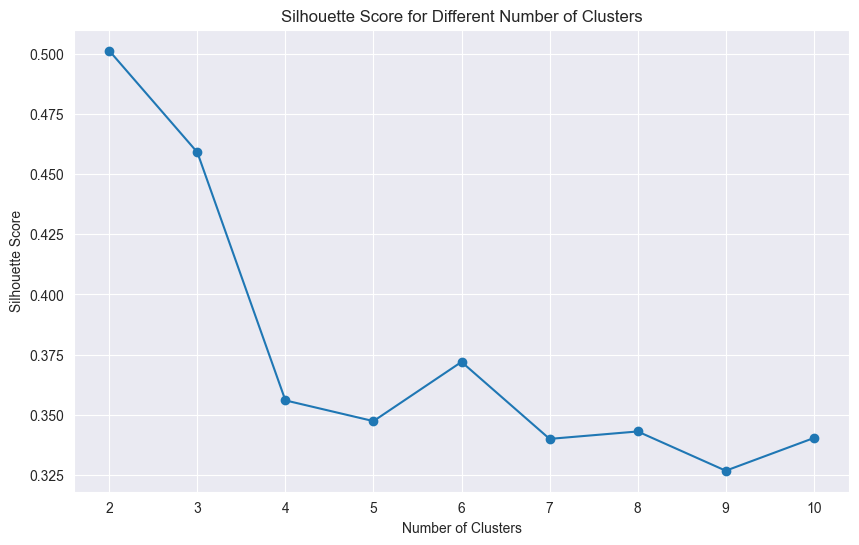

The optimal number of clusters is: 2


<Figure size 640x480 with 0 Axes>

In [12]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Range of possible clusters to evaluate
range_n_clusters = list(range(2, 11))

silhouette_scores_Kmeans = []  

for n_clusters in range_n_clusters:
    # Initialize KMeans with n_clusters
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data_pca)  # Use PCA-reduced data
    
    # Calculate the silhouette score and append to list
    silhouette_avg = silhouette_score(data_pca, cluster_labels)
    silhouette_scores_Kmeans.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the silhouette score is: {silhouette_avg}")

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores_Kmeans, marker='o')
plt.title('Silhouette Score for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


optimal_clusters = range_n_clusters[silhouette_scores_Kmeans.index(max(silhouette_scores_Kmeans))]
print(f"The optimal number of clusters is: {optimal_clusters}")

#save plot
plt.savefig('/Users/taief/Desktop/MusicTry/figures/figures/silhouette_score_kmeans1.png')

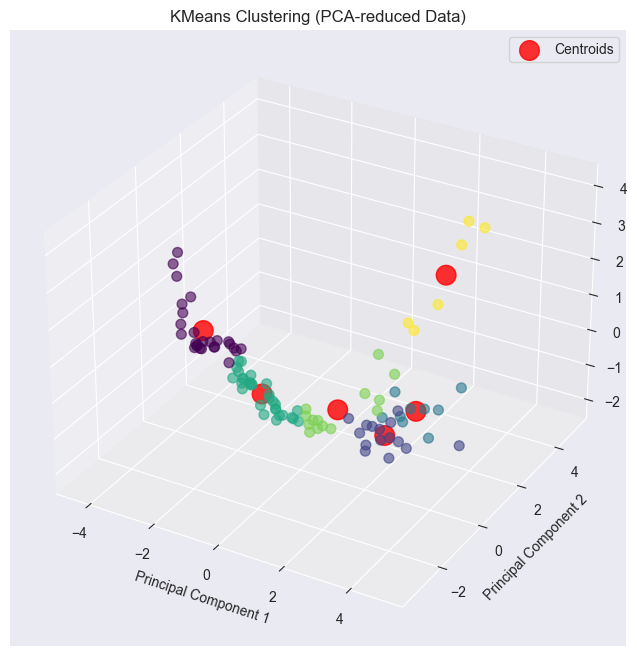

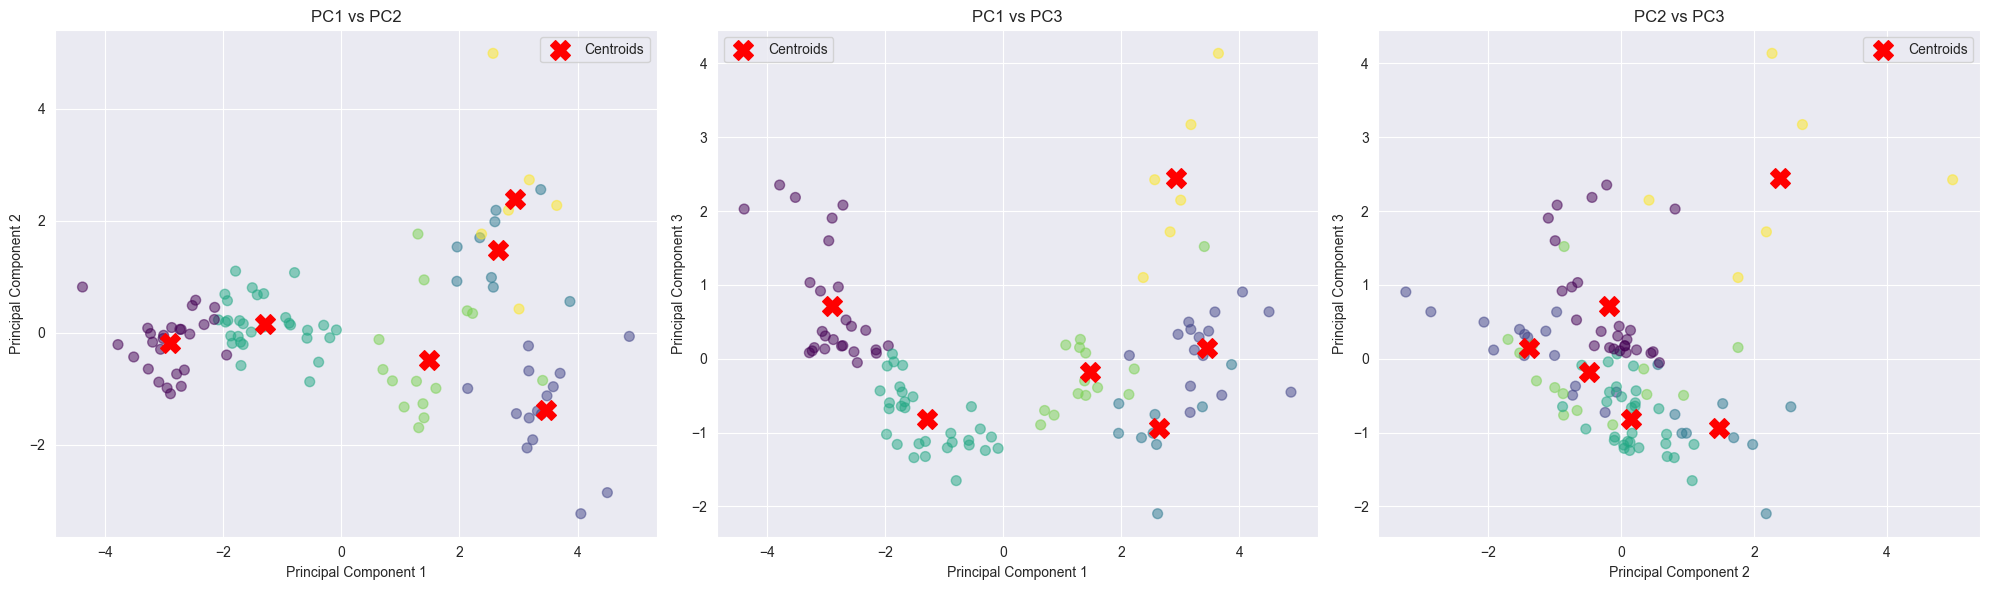

<Figure size 640x480 with 0 Axes>

In [25]:
from mpl_toolkits.mplot3d import Axes3D

optimal_n_clusters = 6
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=10)
kmeans_labels = kmeans.fit_predict(data_pca)

# Plot the clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2],
                     c=kmeans_labels, cmap='viridis', s=50, alpha=0.6)

# Plot the centroids
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],
           c='red', s=200, alpha=0.8, label='Centroids')

ax.set_title('KMeans Clustering (PCA-reduced Data)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.legend()
plt.show()

# Assuming 'kmeans' is your fitted KMeans model with the 'kmeans_labels' and 'data_pca' as before

# Create a figure with subplots in a 1x3 grid
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# Centroids for the principal components
centroids = kmeans.cluster_centers_

# PC1 vs PC2
axs[0].scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50, alpha=0.5)
axs[0].scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')
axs[0].set_title('PC1 vs PC2')
axs[0].set_xlabel('Principal Component 1')
axs[0].set_ylabel('Principal Component 2')
axs[0].legend()

# PC1 vs PC3
axs[1].scatter(data_pca[:, 0], data_pca[:, 2], c=kmeans_labels, cmap='viridis', s=50, alpha=0.5)
axs[1].scatter(centroids[:, 0], centroids[:, 2], c='red', s=200, marker='X', label='Centroids')
axs[1].set_title('PC1 vs PC3')
axs[1].set_xlabel('Principal Component 1')
axs[1].set_ylabel('Principal Component 3')
axs[1].legend()

# PC2 vs PC3
axs[2].scatter(data_pca[:, 1], data_pca[:, 2], c=kmeans_labels, cmap='viridis', s=50, alpha=0.5)
axs[2].scatter(centroids[:, 1], centroids[:, 2], c='red', s=200, marker='X', label='Centroids')
axs[2].set_title('PC2 vs PC3')
axs[2].set_xlabel('Principal Component 2')
axs[2].set_ylabel('Principal Component 3')
axs[2].legend()

# Display the plots
plt.tight_layout()
plt.show()


#save plot
plt.savefig('/Users/taief/Desktop/MusicTry/figures/figures/kmeans_clustering1.png')

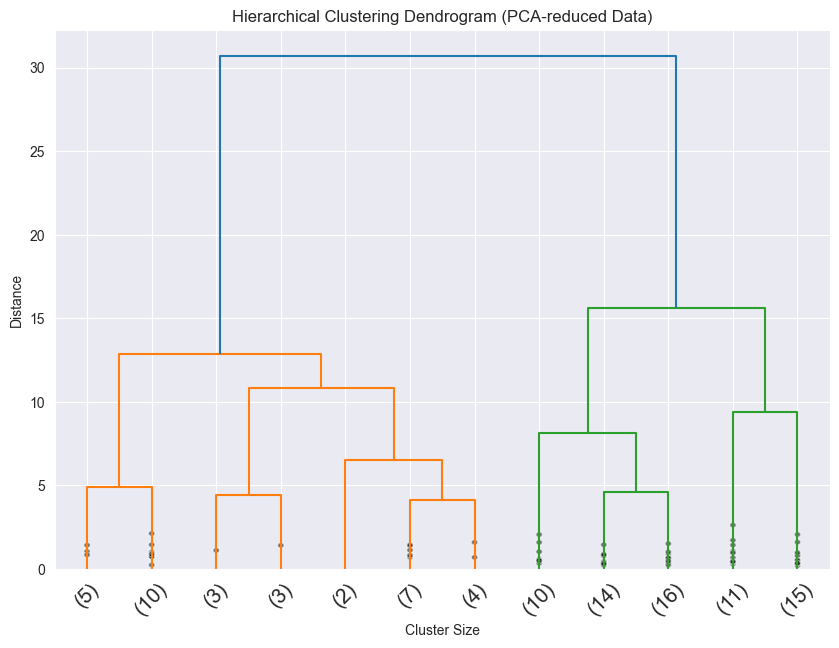

<Figure size 640x480 with 0 Axes>

In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Step 2: Perform Hierarchical Clustering on the PCA-reduced data
Z_ward = linkage(data_pca, method='ward')

# Step 3: Plot the Hierarchical Clustering Dendrogram
plt.figure(figsize=(10, 7))
plt.title('Hierarchical Clustering Dendrogram (PCA-reduced Data)')
dendrogram(Z_ward, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15., show_contracted=True)
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

#save plot
plt.savefig('/Users/taief/Desktop/MusicTry/figures/figures/hierarchical_clustering_dendrogram1.png')

For n_clusters = 2, the silhouette score is: 0.4617948020958124
For n_clusters = 3, the silhouette score is: 0.3307383255604986
For n_clusters = 4, the silhouette score is: 0.35332136934170805
For n_clusters = 5, the silhouette score is: 0.3796187009730439
For n_clusters = 6, the silhouette score is: 0.34832578480157345
For n_clusters = 7, the silhouette score is: 0.3564948068495919
For n_clusters = 8, the silhouette score is: 0.36566946540763207
For n_clusters = 9, the silhouette score is: 0.34713585195416413
For n_clusters = 10, the silhouette score is: 0.3205661416154091


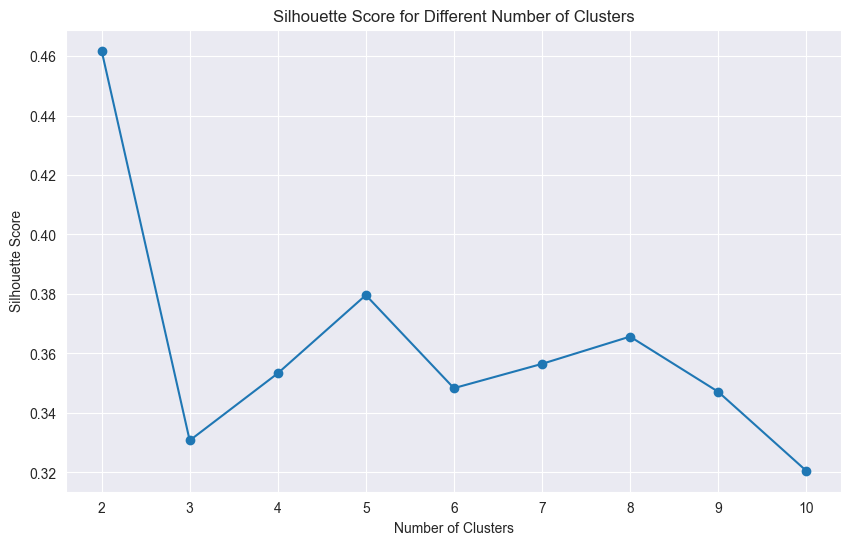

<Figure size 640x480 with 0 Axes>

In [15]:
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import fcluster

# Initialize a list to store the silhouette scores
silhouette_scores_ward = []

# Calculate silhouette scores for different numbers of clusters and store them
for n_clusters in range(2, 11):
    # Perform hierarchical clustering for the current number of clusters
    labels = fcluster(Z_ward, n_clusters, criterion='maxclust')
    # Calculate silhouette score for the current number of clusters
    silhouette_avg = silhouette_score(data_pca, labels)
    silhouette_scores_ward.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the silhouette score is: {silhouette_avg}")


# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores_ward, marker='o')
plt.title('Silhouette Score for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11)) 
plt.show()

#save plot
plt.savefig('/Users/taief/Desktop/MusicTry/figures/figures/silhouette_score_hierarchical_clustering1.png')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


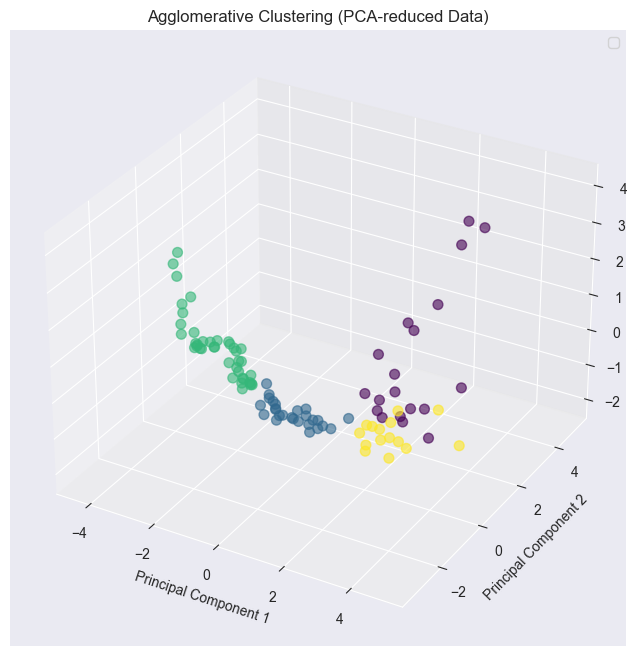

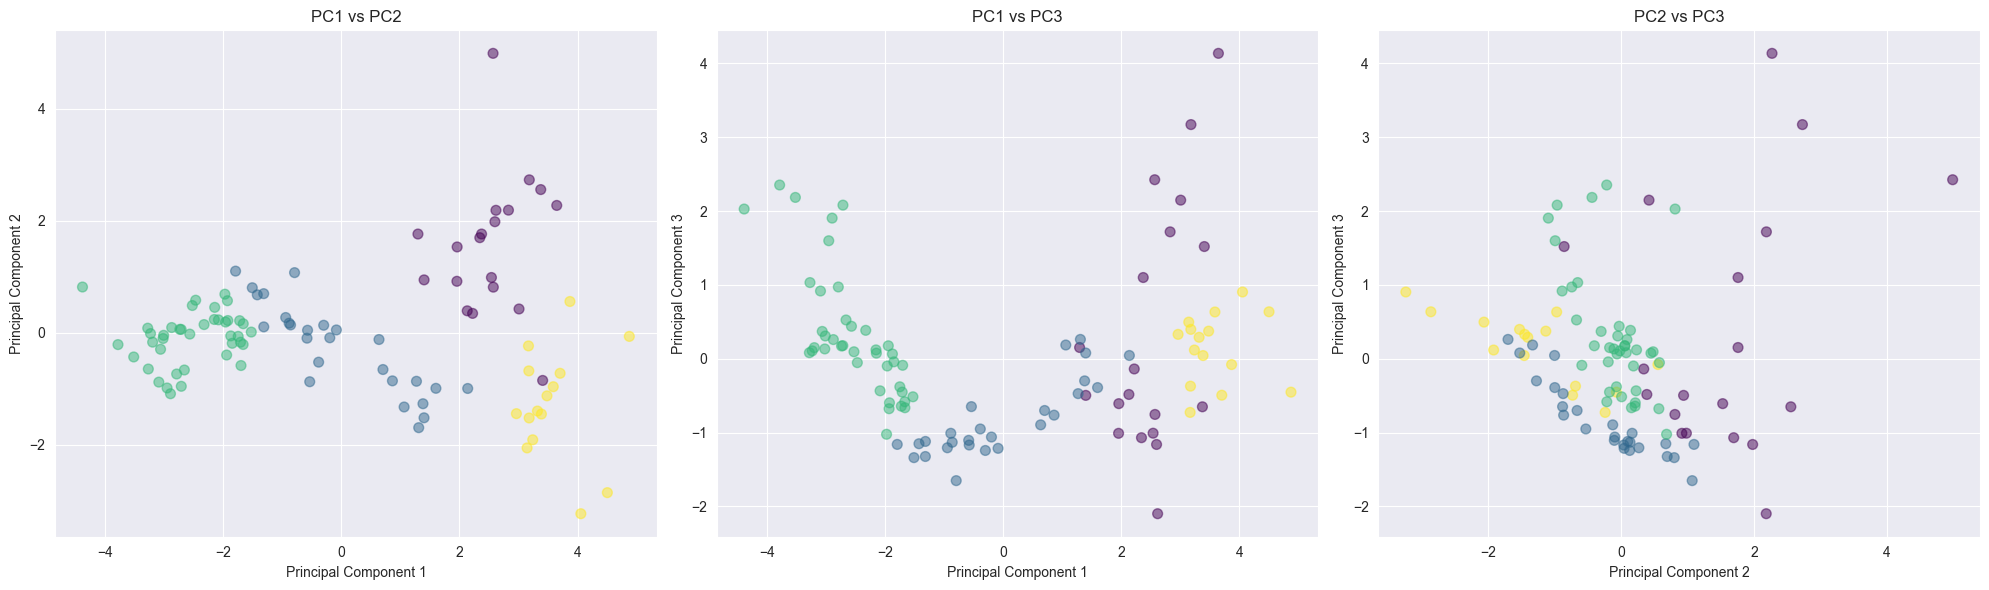

<Figure size 640x480 with 0 Axes>

In [16]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Determining the optimal number of clusters from silhouette scores or dendrogram
n_clusters = 4

# Performing Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
agg_labels = agg_cluster.fit_predict(data_pca)

# 3D Plot for Agglomerative Clustering results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2],
                     c=agg_labels, cmap='viridis', s=50, alpha=0.6)
ax.set_title('Agglomerative Clustering (PCA-reduced Data)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.legend()
plt.show()

# 2D Subplots for Agglomerative Clustering results
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# PC1 vs PC2
axs[0].scatter(data_pca[:, 0], data_pca[:, 1], c=agg_labels, cmap='viridis', s=50, alpha=0.5)
axs[0].set_title('PC1 vs PC2')
axs[0].set_xlabel('Principal Component 1')
axs[0].set_ylabel('Principal Component 2')

# PC1 vs PC3
axs[1].scatter(data_pca[:, 0], data_pca[:, 2], c=agg_labels, cmap='viridis', s=50, alpha=0.5)
axs[1].set_title('PC1 vs PC3')
axs[1].set_xlabel('Principal Component 1')
axs[1].set_ylabel('Principal Component 3')

# PC2 vs PC3
axs[2].scatter(data_pca[:, 1], data_pca[:, 2], c=agg_labels, cmap='viridis', s=50, alpha=0.5)
axs[2].set_title('PC2 vs PC3')
axs[2].set_xlabel('Principal Component 2')
axs[2].set_ylabel('Principal Component 3')

# Display the plots
plt.tight_layout()
plt.show()

#save plot
plt.savefig('/Users/taief/Desktop/MusicTry/figures/figures/agglomerative_clustering1.png')

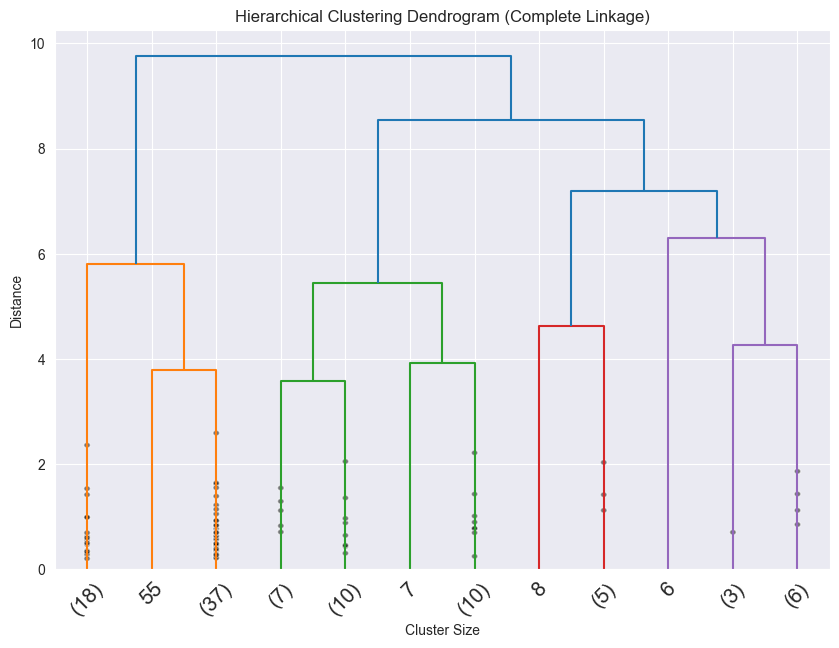

<Figure size 640x480 with 0 Axes>

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Perform Hierarchical Clustering with 'complete' linkage
Z_complete = linkage(data_pca, method='complete')
plt.figure(figsize=(10, 7))
plt.title('Hierarchical Clustering Dendrogram (Complete Linkage)')
dendrogram(Z_complete, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15., show_contracted=True)
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

#save plot
plt.savefig('/Users/taief/Desktop/MusicTry/figures/figures/hierarchical_clustering_dendrogram_complete1.png')

For n_clusters = 2, the silhouette score is: 0.50136528970424
For n_clusters = 3, the silhouette score is: 0.4119838236134074
For n_clusters = 4, the silhouette score is: 0.41994644896998656
For n_clusters = 5, the silhouette score is: 0.41492961790318206
For n_clusters = 6, the silhouette score is: 0.31605452002656714
For n_clusters = 7, the silhouette score is: 0.33575291514150574
For n_clusters = 8, the silhouette score is: 0.3262635043454324
For n_clusters = 9, the silhouette score is: 0.32971838536626413
For n_clusters = 10, the silhouette score is: 0.32922875026957144


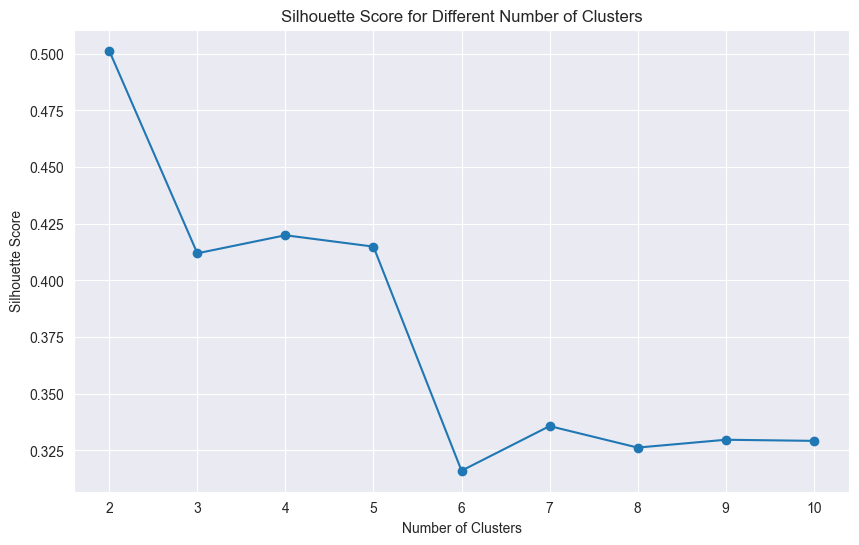

<Figure size 640x480 with 0 Axes>

In [18]:
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import fcluster

# Initialize a list to store the silhouette scores
silhouette_scores_complete = []

# Calculate silhouette scores for different numbers of clusters and store them
for n_clusters in range(2, 11):
    # Perform hierarchical clustering for the current number of clusters
    labels = fcluster(Z_complete, n_clusters, criterion='maxclust')
    # Calculate silhouette score for the current number of clusters
    silhouette_avg = silhouette_score(data_pca, labels)
    silhouette_scores_complete.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the silhouette score is: {silhouette_avg}")


# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores_complete, marker='o')
plt.title('Silhouette Score for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11)) 
plt.show()

#save plot
plt.savefig('/Users/taief/Desktop/MusicTry/figures/figures/silhouette_score_hierarchical_clustering_complete1.png')

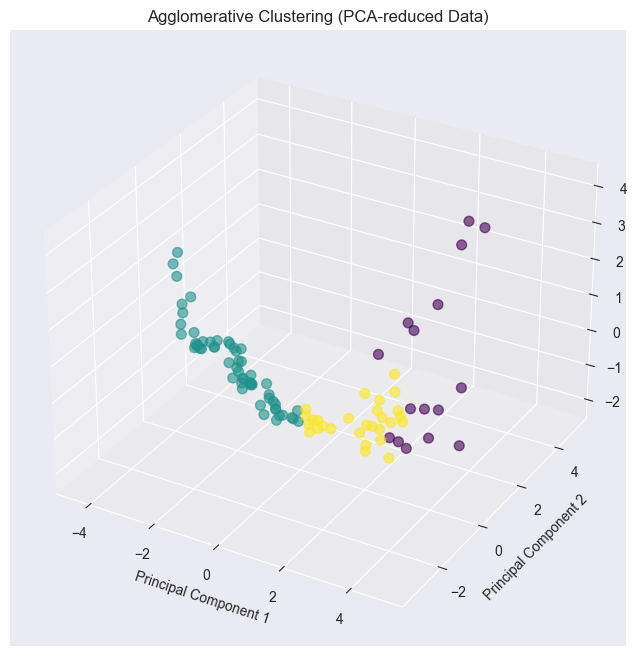

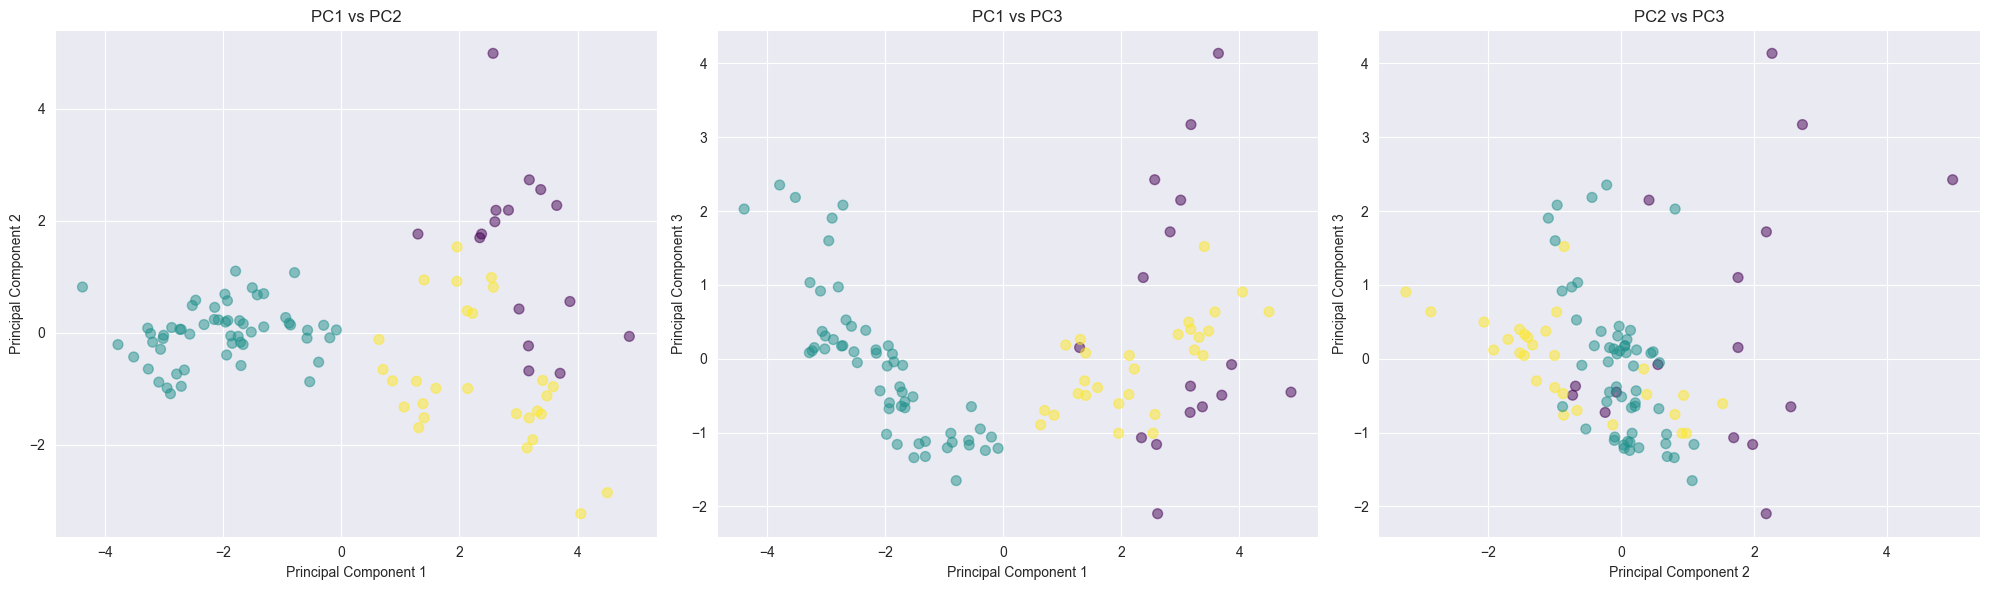

<Figure size 640x480 with 0 Axes>

In [19]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Determining the optimal number of clusters from silhouette scores or dendrogram
n_clusters = 3

# Performing Agglomerative Clustering with 'complete' linkage
agg_cluster_complete = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete')
agg_labels_complete = agg_cluster_complete.fit_predict(data_pca)  

# 3D Plot for Agglomerative Clustering results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2], c=agg_labels_complete, cmap='viridis', s=50, alpha=0.6)
ax.set_title('Agglomerative Clustering (PCA-reduced Data)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# 2D Subplots for Agglomerative Clustering results
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# PC1 vs PC2
axs[0].scatter(data_pca[:, 0], data_pca[:, 1], c=agg_labels_complete, cmap='viridis', s=50, alpha=0.5)
axs[0].set_title('PC1 vs PC2')
axs[0].set_xlabel('Principal Component 1')
axs[0].set_ylabel('Principal Component 2')

# PC1 vs PC3
axs[1].scatter(data_pca[:, 0], data_pca[:, 2], c=agg_labels_complete, cmap='viridis', s=50, alpha=0.5)
axs[1].set_title('PC1 vs PC3')
axs[1].set_xlabel('Principal Component 1')
axs[1].set_ylabel('Principal Component 3')

# PC2 vs PC3
axs[2].scatter(data_pca[:, 1], data_pca[:, 2], c=agg_labels_complete, cmap='viridis', s=50, alpha=0.5)
axs[2].set_title('PC2 vs PC3')
axs[2].set_xlabel('Principal Component 2')
axs[2].set_ylabel('Principal Component 3')

# Display the plots
plt.tight_layout()
plt.show()

#save plot
plt.savefig('/Users/taief/Desktop/MusicTry/figures/figures/agglomerative_clustering_complete1.png')


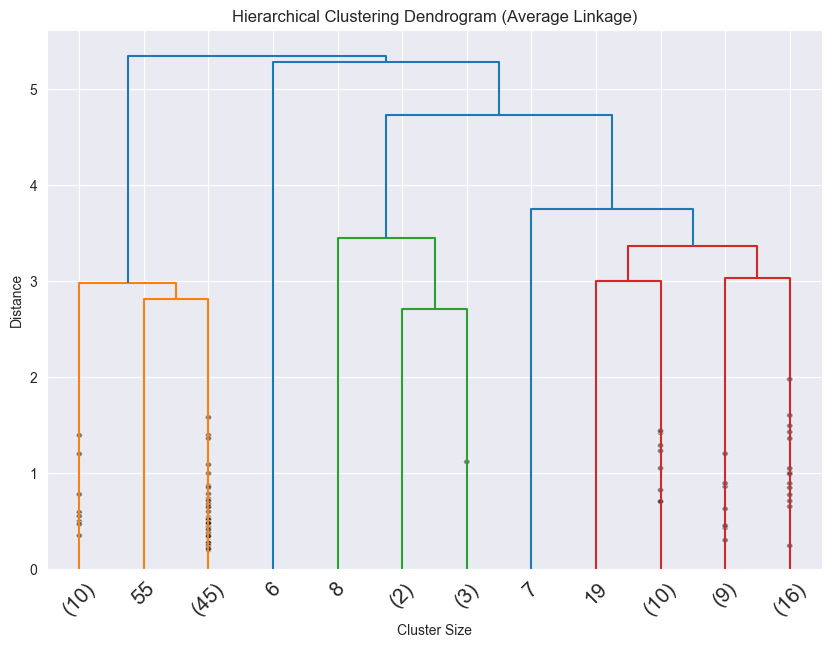

<Figure size 640x480 with 0 Axes>

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Perform Hierarchical Clustering with 'complete' linkage
Z_average = linkage(data_pca, method='average')
plt.figure(figsize=(10, 7))
plt.title('Hierarchical Clustering Dendrogram (Average Linkage)')
dendrogram(Z_average, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15., show_contracted=True)
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

#save plot
plt.savefig('/Users/taief/Desktop/MusicTry/figures/figures/hierarchical_clustering_dendrogram_average1.png')

For n_clusters = 2, the silhouette score is: 0.50136528970424
For n_clusters = 3, the silhouette score is: 0.47866755244327536
For n_clusters = 4, the silhouette score is: 0.47987375952506495
For n_clusters = 5, the silhouette score is: 0.43161493501860726
For n_clusters = 6, the silhouette score is: 0.4200194339916269
For n_clusters = 7, the silhouette score is: 0.434544866996662
For n_clusters = 8, the silhouette score is: 0.39014033681084265
For n_clusters = 9, the silhouette score is: 0.3845129344670651
For n_clusters = 10, the silhouette score is: 0.34438433851521616


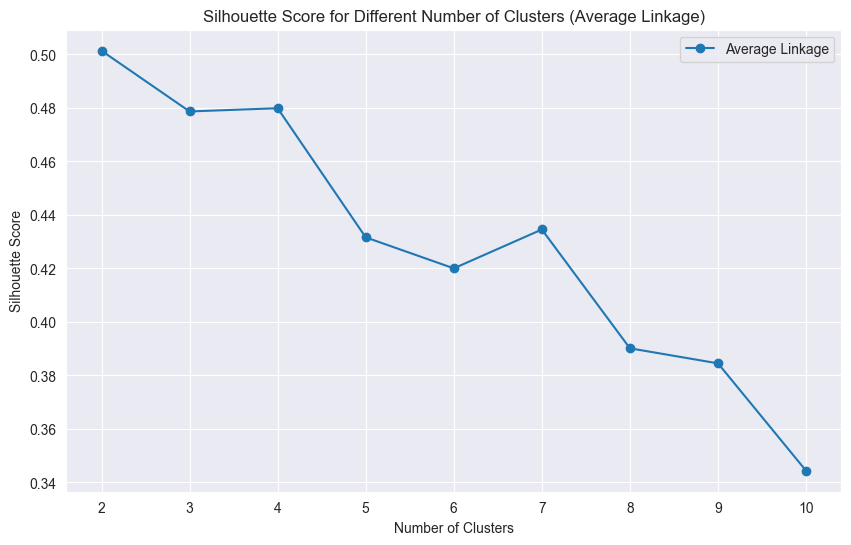

<Figure size 640x480 with 0 Axes>

In [21]:
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import fcluster
import matplotlib.pyplot as plt

# Initialize a list to store the silhouette scores
silhouette_scores_average = []

# Calculate silhouette scores for different numbers of clusters and store them
for n_clusters in range(2, 11):
    # Perform hierarchical clustering for the current number of clusters
    labels = fcluster(Z_average, n_clusters, criterion='maxclust')
    # Calculate silhouette score for the current number of clusters
    silhouette_avg = silhouette_score(data_pca, labels)
    silhouette_scores_average.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the silhouette score is: {silhouette_avg}")

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores_average, marker='o', label='Average Linkage')
plt.title('Silhouette Score for Different Number of Clusters (Average Linkage)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.legend()
plt.show()

#save plot
plt.savefig('/Users/taief/Desktop/MusicTry/figures/figures/silhouette_score_hierarchical_clustering_average1.png')

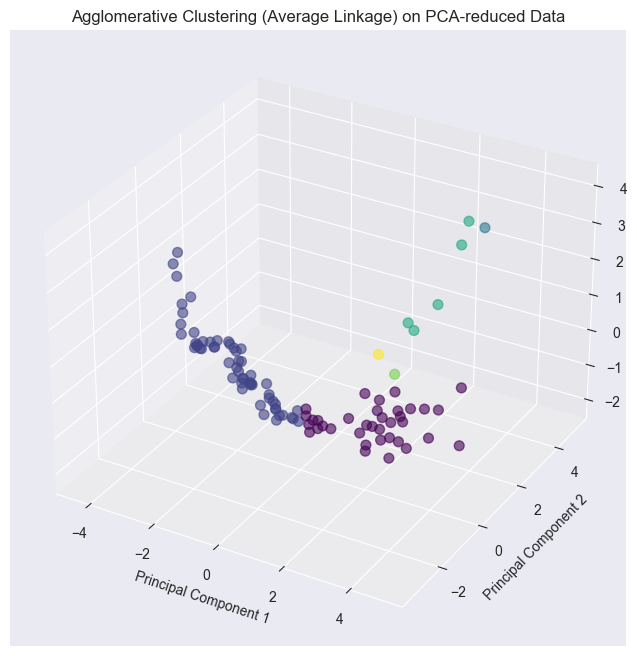

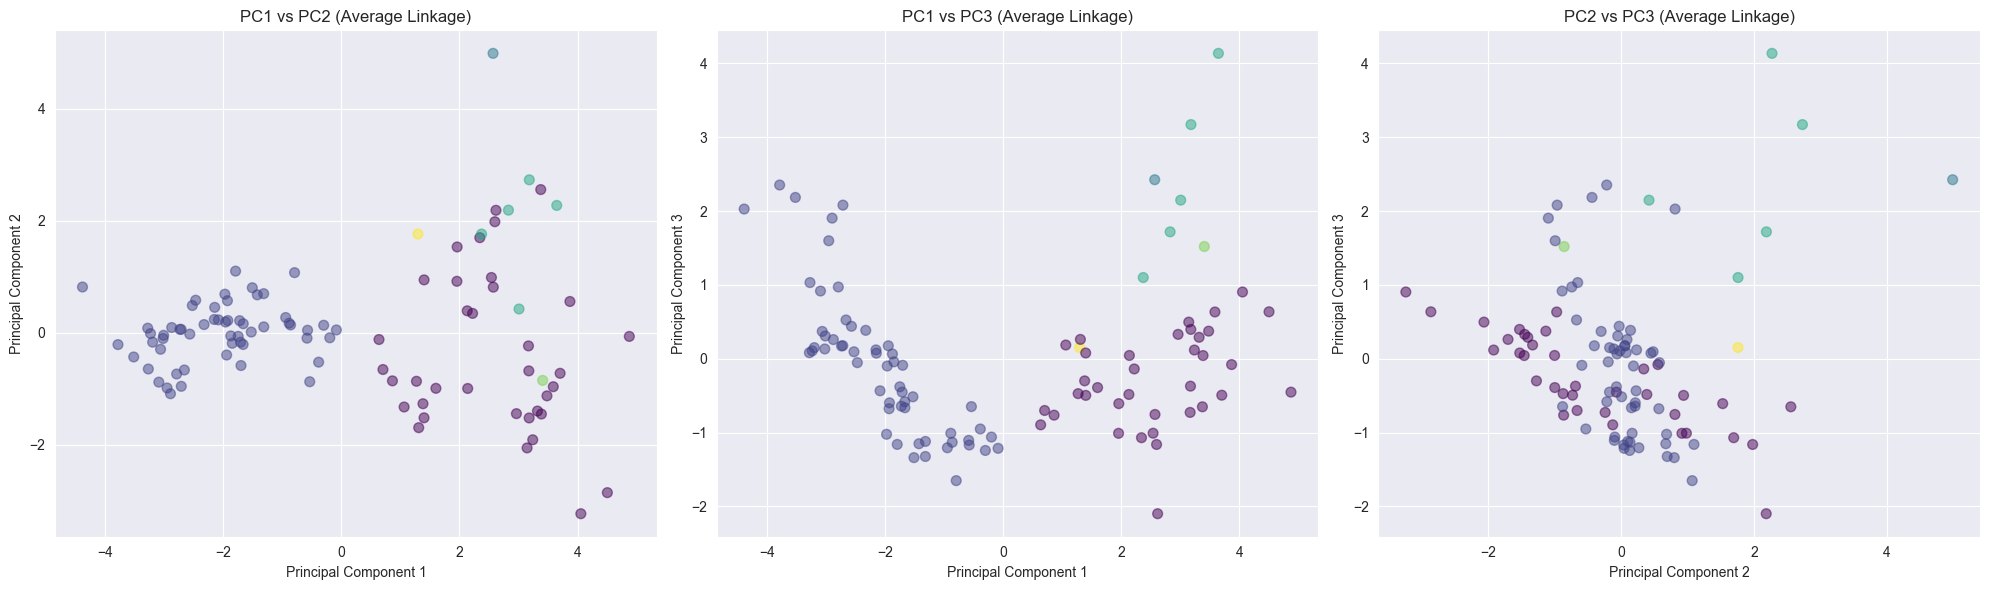

<Figure size 640x480 with 0 Axes>

In [22]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Determining the optimal number of clusters from silhouette scores or dendrogram
n_clusters = 6

# Performing Agglomerative Clustering with 'average' linkage
agg_cluster_avg = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
agg_labels_avg = agg_cluster_avg.fit_predict(data_pca)  # Correctly using 'average' linkage results

# 3D Plot for Agglomerative Clustering results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2], c=agg_labels_avg, cmap='viridis', s=50, alpha=0.6)
ax.set_title('Agglomerative Clustering (Average Linkage) on PCA-reduced Data')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# 2D Subplots for Agglomerative Clustering results
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# PC1 vs PC2
axs[0].scatter(data_pca[:, 0], data_pca[:, 1], c=agg_labels_avg, cmap='viridis', s=50, alpha=0.5)
axs[0].set_title('PC1 vs PC2 (Average Linkage)')
axs[0].set_xlabel('Principal Component 1')
axs[0].set_ylabel('Principal Component 2')

# PC1 vs PC3
axs[1].scatter(data_pca[:, 0], data_pca[:, 2], c=agg_labels_avg, cmap='viridis', s=50, alpha=0.5)
axs[1].set_title('PC1 vs PC3 (Average Linkage)')
axs[1].set_xlabel('Principal Component 1')
axs[1].set_ylabel('Principal Component 3')

# PC2 vs PC3
axs[2].scatter(data_pca[:, 1], data_pca[:, 2], c=agg_labels_avg, cmap='viridis', s=50, alpha=0.5)
axs[2].set_title('PC2 vs PC3 (Average Linkage)')
axs[2].set_xlabel('Principal Component 2')
axs[2].set_ylabel('Principal Component 3')

# Display the plots
plt.tight_layout()
plt.show()

#save plot
plt.savefig('/Users/taief/Desktop/MusicTry/figures/figures/agglomerative_clustering_average1.png')

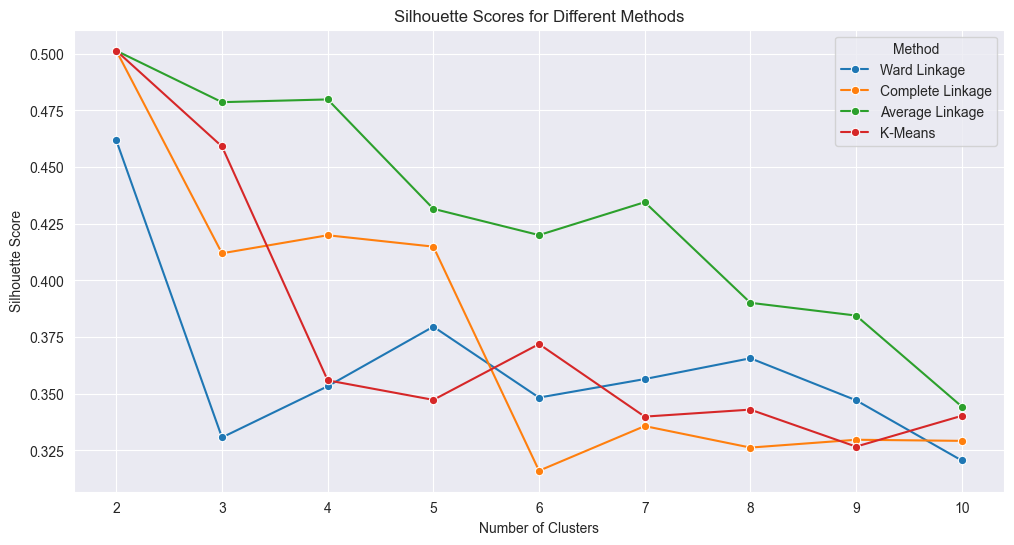

<Figure size 640x480 with 0 Axes>

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ward_scores_df = pd.DataFrame({'Number of Clusters': range_n_clusters, 'Silhouette Score': silhouette_scores_ward})
complete_scores_df = pd.DataFrame({'Number of Clusters': range_n_clusters, 'Silhouette Score': silhouette_scores_complete})
average_scores_df = pd.DataFrame({'Number of Clusters': range_n_clusters, 'Silhouette Score': silhouette_scores_average})

# Combine all the scores into a single DataFrame
all_scores_df = pd.concat([ward_scores_df, complete_scores_df, average_scores_df], ignore_index=True)

# Add a column for the method
all_scores_df['Method'] = ['Ward Linkage'] * len(range_n_clusters) + ['Complete Linkage'] * len(range_n_clusters) + ['Average Linkage'] * len(range_n_clusters)

# Create a DataFrame for K-Means scores
kmeans_scores_df = pd.DataFrame({'Number of Clusters': range_n_clusters, 'Silhouette Score': silhouette_scores_Kmeans})
kmeans_scores_df['Method'] = 'K-Means'

# Concatenate all DataFrames
all_scores_df = pd.concat([all_scores_df, kmeans_scores_df], ignore_index=True)

# Plotting with Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=all_scores_df, x='Number of Clusters', y='Silhouette Score', hue='Method', marker='o')

plt.title('Silhouette Scores for Different Methods')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend(title='Method')
plt.show()

#save plot
plt.savefig('/Users/taief/Desktop/MusicTry/figures/figures/silhouette_scores_for_different_methods1.png')

<Figure size 1200x800 with 0 Axes>

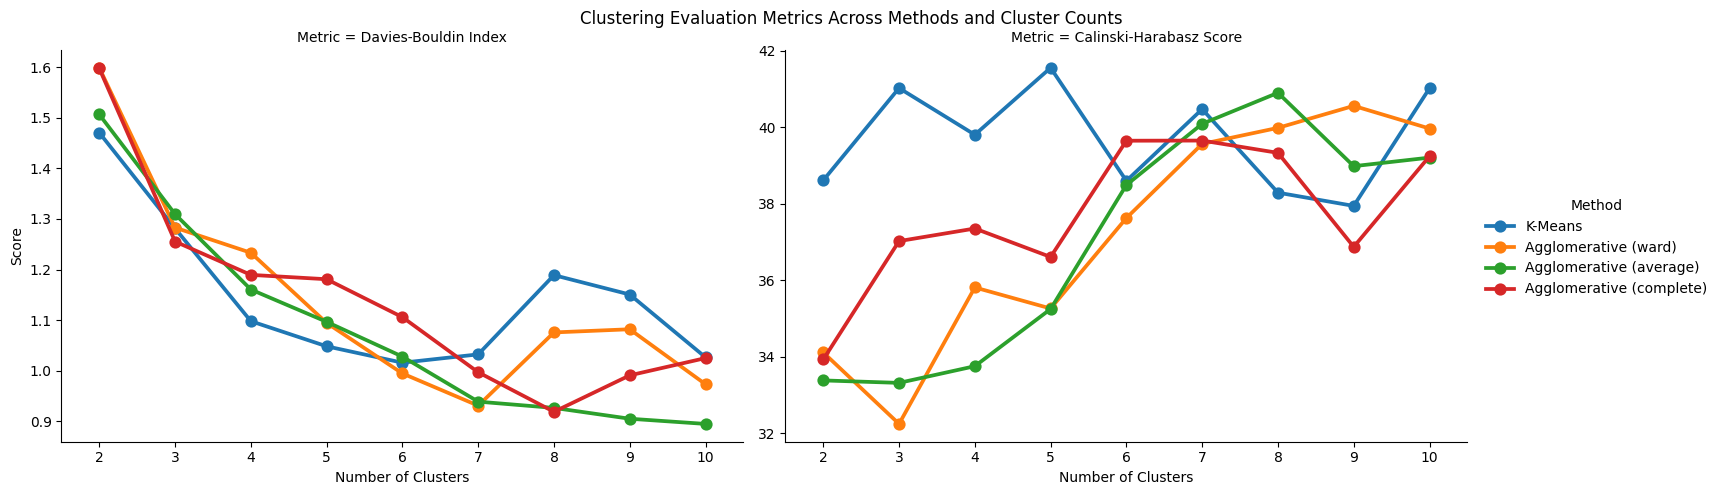

<Figure size 640x480 with 0 Axes>

In [69]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import KMeans, AgglomerativeClustering
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



def calculate_indices(data, cluster_labels):
    davies_bouldin = davies_bouldin_score(data, cluster_labels)
    calinski_harabasz = calinski_harabasz_score(data, cluster_labels)
    return davies_bouldin, calinski_harabasz

results = []

# Define the range of cluster numbers to evaluate
cluster_range = range(2, 11)

# Evaluate K-Means
for n_clusters in cluster_range:
    kmeans_labels = KMeans(n_clusters=n_clusters, random_state=42).fit_predict(data_pca)
    db_index, ch_score = calculate_indices(data_pca, kmeans_labels)
    results.append({
        'Method': 'K-Means',
        'Number of Clusters': n_clusters,
        'Davies-Bouldin Index': db_index,
        'Calinski-Harabasz Score': ch_score
    })

# Evaluate Agglomerative Clustering for each linkage type
linkages = ['ward', 'average', 'complete']
for linkage in linkages:
    for n_clusters in cluster_range:
        agg_labels = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage).fit_predict(data_pca)
        db_index, ch_score = calculate_indices(data_pca, agg_labels)
        results.append({
            'Method': f'Agglomerative ({linkage})',
            'Number of Clusters': n_clusters,
            'Davies-Bouldin Index': db_index,
            'Calinski-Harabasz Score': ch_score
        })

# Convert the results to a DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Melt the DataFrame to make it suitable for sns.catplot
df_melted = results_df.melt(id_vars=['Method', 'Number of Clusters'], var_name='Metric', value_name='Score')

# Visualization
plt.figure(figsize=(12, 8))
sns.catplot(
    data=df_melted,
    x='Number of Clusters', y='Score', hue='Method', col='Metric',
    kind='point', col_wrap=2, height=5, aspect=1.5, marker='o', linestyles='-',
    sharey=False 
)

plt.subplots_adjust(top=0.9)
plt.suptitle('Clustering Evaluation Metrics Across Methods and Cluster Counts')
plt.show()

#save plot
plt.savefig('/Users/taief/Desktop/MusicTry/figures/figures/clustering_evaluation_metrics1.png')

In [ ]:
C